In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from fancyimpute import IterativeImputer
#pip install fancyimpute beforehand if u've never used it

from sklearn.preprocessing import LabelEncoder

In [122]:
def make_normal_log(data, col):
    '''
    Make var's distribution norm using np.log. This function helps to notmalise it without considering 0
    '''
    data['Check'] = pd.Series(len(data[col]), index=data.index)
    data['Check'] = 0 
    data.loc[data[col]>0,'Check'] = 1
    data.loc[data['Check']==1, col] = np.log(data[col])

In [123]:
import math
def signif_r(n, r):
    '''
    the function counts significant of r parameter using hypothesis checking. H0:r=0, H1:r<>0
    alpha = 0.05 Student's T critical value for two tails zone and k (degrees of freedom)>120 = 1.96
    '''
    T = (r*math.sqrt(n-2)) / (math.sqrt(1-r**2))
    if T > 1.96:
        return 'correlation is significant'
    else:
        return 'no correlation found'

In [124]:
def work_with_outl(data,col):
    '''
    The function searches for outliers and delets them from df. reset_index is necessary for index recalculating
    '''
    if 'level_0' in data:
        data = data.drop(['level_0'], axis=1)
    data = data.reset_index()
    data[col] = sorted(data[col])
    q1, q3 = np.percentile(data[col],[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr) 
    for i in range(len(data[col]-1)):
        if upper_bound < data[col][i] or data[col][i] < lower_bound:
            data = data.drop([i])
    return data

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [125]:
data = pd.read_csv('/Users/apple/Documents/!data analysis/Kaggle/train HPr.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [127]:
# list of cols with missing data
a = data.isnull().any().to_frame()
withNones = [a.index[num] for num in range(len(a)-1) if a[0][num]==True]
print(withNones)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [128]:
#As for missing data I'll delete variables, where we have obviously small amount of non-missing
data = data.drop(columns=['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'])

In [129]:
#Im going to fill nans for these purpose I'll split my datasets in two (numeric and categorical)
data_numeric_only = data.select_dtypes(include=[np.float, np.int])
data_categ = data.select_dtypes(include=[np.object])

In [130]:
#check weather splitting was ok
data_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [131]:
# For filling nans, I've chosen MICE robust algorithm from fancyimpute
mice = IterativeImputer()
data_numeric_only = pd.DataFrame(data=mice.fit_transform(data_numeric_only), 
                            columns=data_numeric_only.columns, index=data_numeric_only.index)

data_numeric_only.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0


In [132]:
#Now work with categorical variables. For them We may use LabelEncoder
#Encoder doesn't work witn nans but for filling nans we need encoded data :D
#encoded with nans keeping
data_cat_enc = data_categ.apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

In [133]:
data_cat = pd.DataFrame(data=mice.fit_transform(data_cat_enc), 
                            columns=data_cat_enc.columns, index=data_cat_enc.index)
data_cat.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,4.0,3.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0


In [134]:
data_cat.isnull().any().any()

False

In [135]:
data_numeric = pd.concat([data_numeric_only, data_cat], axis=1, sort=False)

In [136]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

Now we don't have any missing values in our dataset

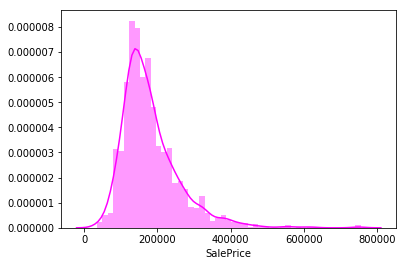

In [137]:
#if wright %matplotlib then all plots will open in separate window
sns.distplot(data_numeric['SalePrice'], color='magenta')
plt.show()

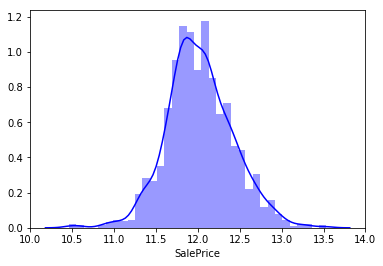

In [138]:
#let's normilize it
data_numeric['SalePrice'] = np.log(data_numeric['SalePrice'])

sns.distplot(data_numeric['SalePrice'], color='blue')
plt.show()

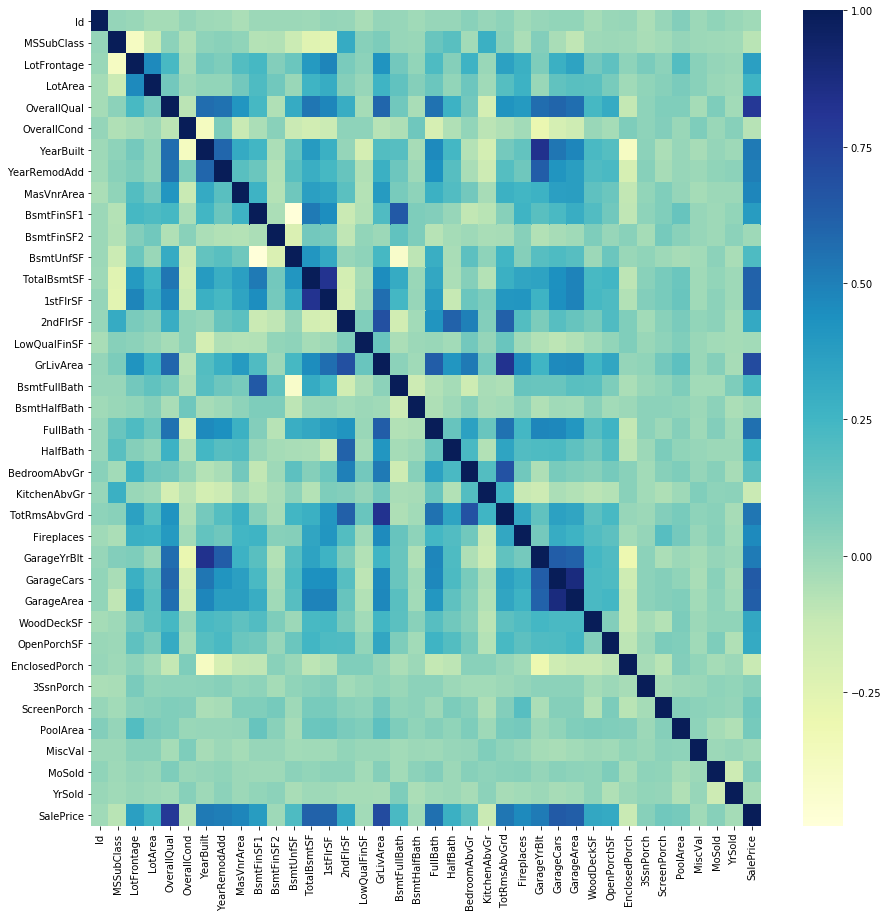

In [139]:
# Next find correlations with numerical varibles (only those which were numeric)
#plt.rcParams['figure.figsize'] = (15,15)
plt.subplots(figsize=(15,15))
corr = data_numeric_only.corr(method='pearson')
sns.heatmap(corr, cmap='YlGnBu');

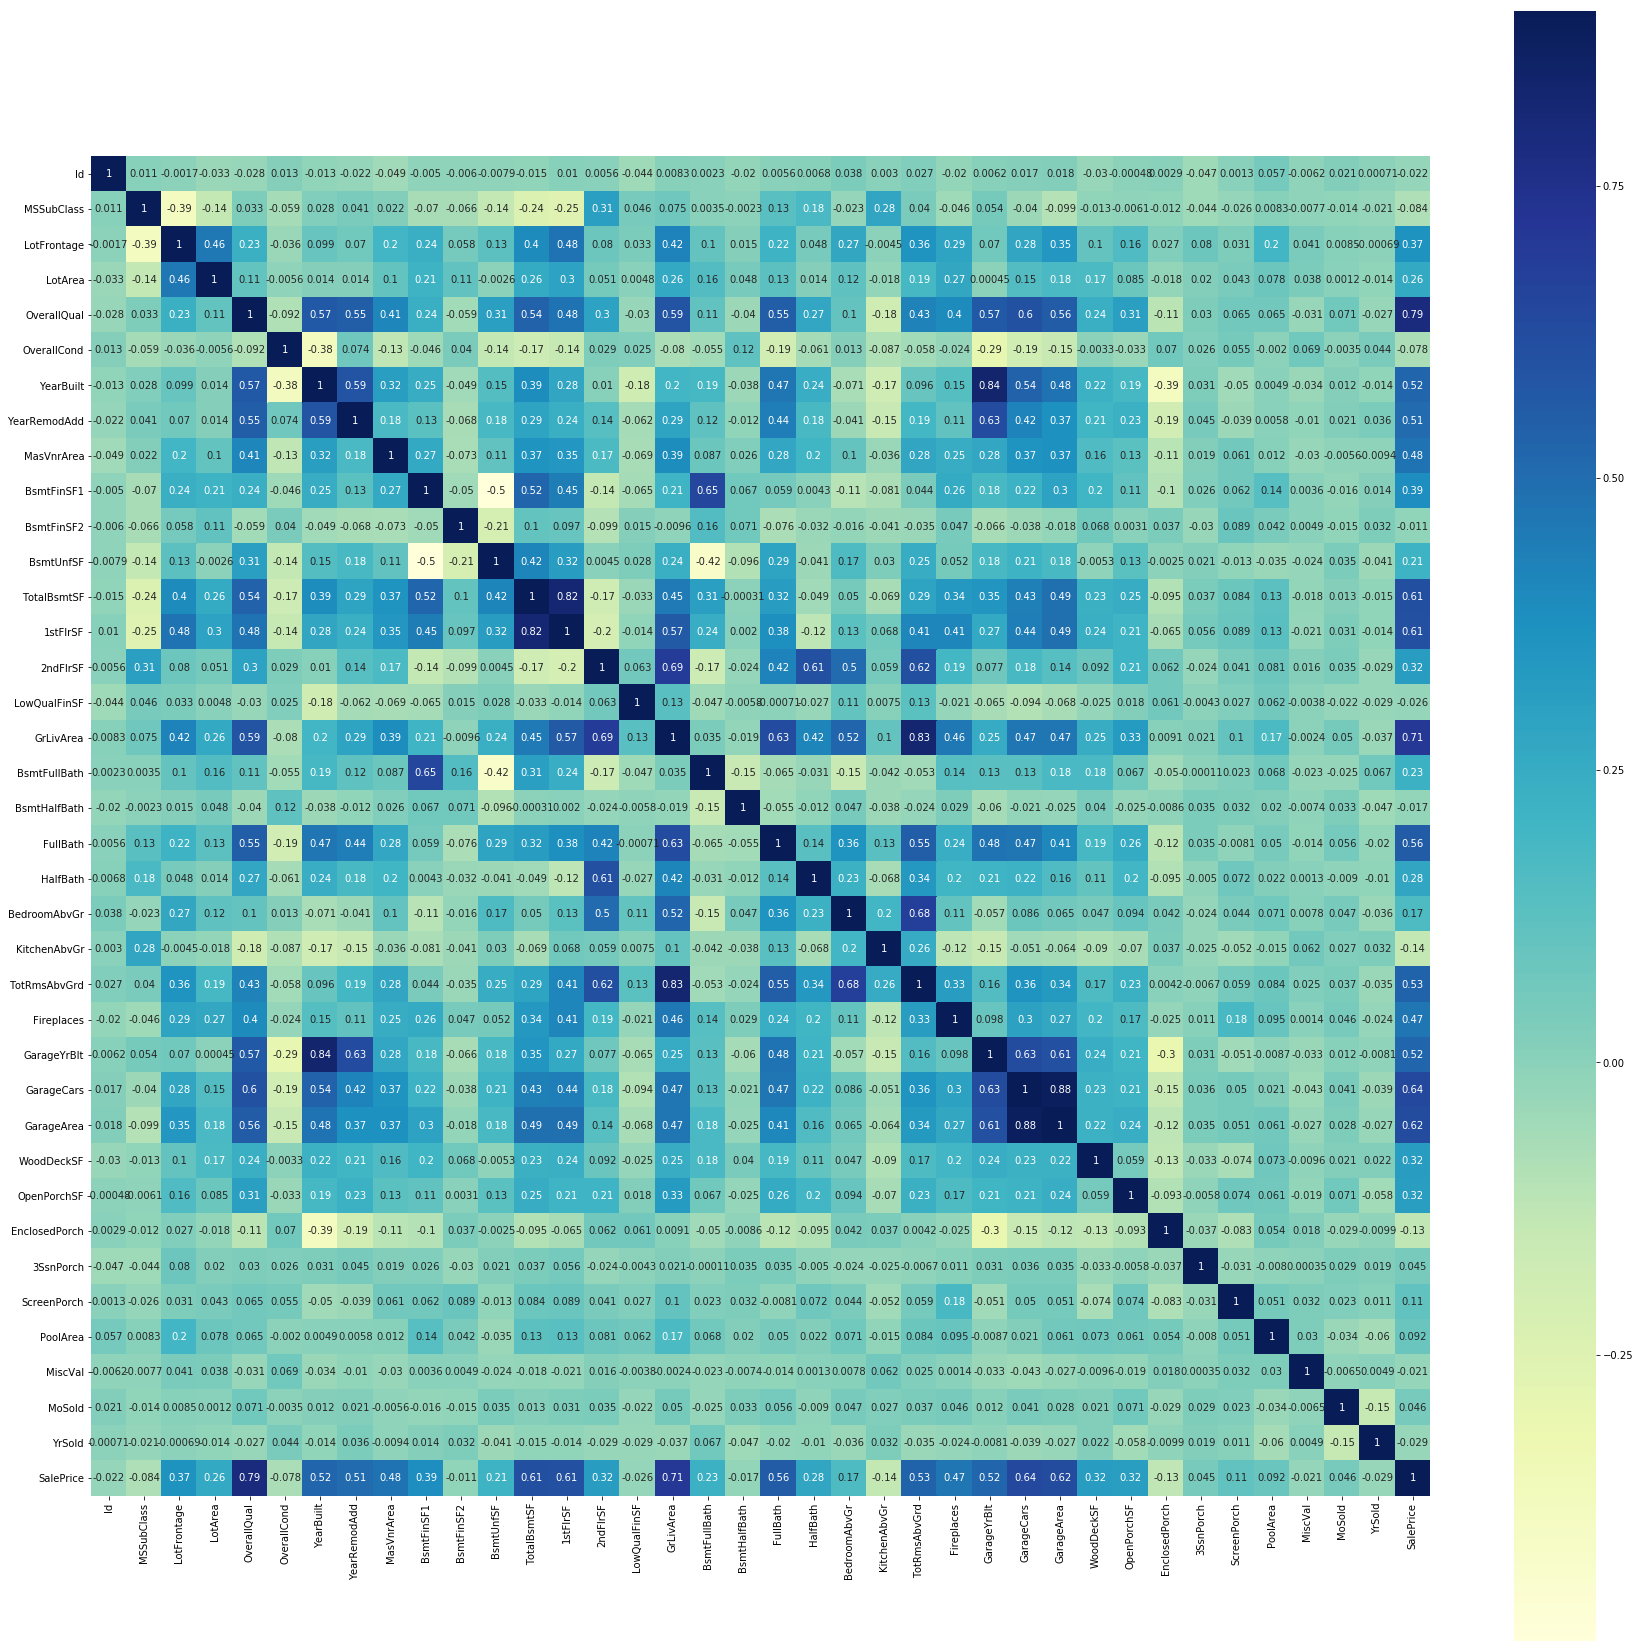

In [140]:
plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot=True, vmax=0.9, square=True, cmap='YlGnBu');

In [141]:
corr_frame = corr['SalePrice'].sort_values(ascending=False).to_frame()
corr_frame = corr_frame.drop(['SalePrice'], axis=0) #Sale Price with itself has 1, drop it
#To choose the most influencial values, I'd prefer to measure significants of the coefficients. 

In [142]:
corr_dict = dict(zip(corr_frame.index, corr_frame.values.ravel().tolist()))

In [143]:
signif_corr = [key for key, value in corr_dict.items() if signif_r(1460, value) == 'correlation is significant' ]
#here is top 27 most influencial on Sale Price features (hope so)
#Let's plot them
signif_corr

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'GarageYrBlt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea']

Next step is to understand, what is the distribution of the selected numeric variables, make thier distribution close to normal and work with outliers.

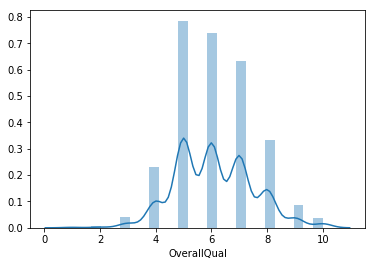

In [144]:
#Top
from scipy import stats
sns.distplot(data_numeric['OverallQual'])
plt.show()

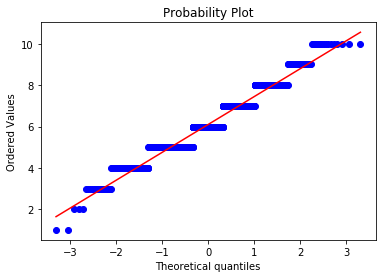

In [145]:
res = stats.probplot(data_numeric['OverallQual'], plot=plt)
#Seems normal wont' transform

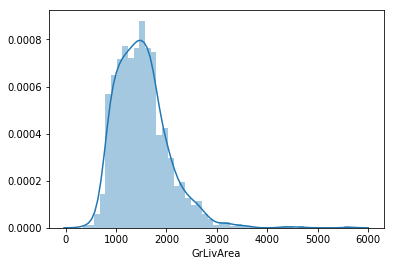

In [146]:
sns.distplot(data_numeric['GrLivArea'])
plt.show()
#make it normal
data_numeric['GrLivArea'] = np.log(data_numeric['GrLivArea'])

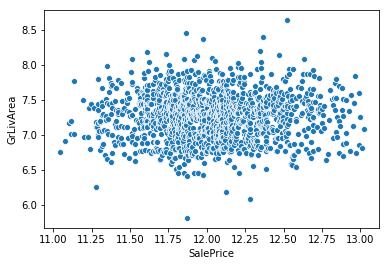

In [147]:
data_numeric = work_with_outl(data_numeric,'SalePrice')

sns.scatterplot(x=data_numeric['SalePrice'], y=data_numeric['GrLivArea'])

In [148]:
len(data_numeric) 
#outliers were dropped!

1432

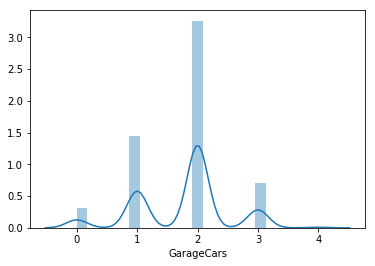

In [149]:
sns.distplot(data_numeric['GarageCars'])
plt.show()

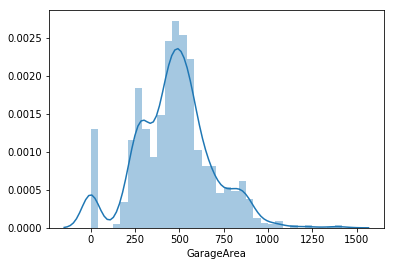

In [150]:
sns.distplot(data_numeric['GarageArea'])
plt.show()

In [151]:
#This Check col is necessary to make distribution normal
make_normal_log(data_numeric, 'GarageArea')

# In this case we get normalized distribution but with stand-aside zeros, for now, I'm not sure, should I drop them
#Think - no.

/Users/apple/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


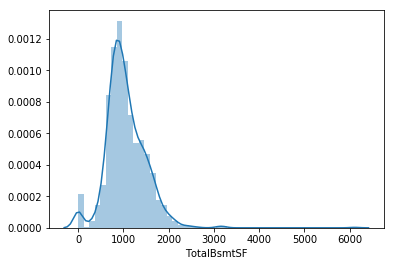

In [152]:
sns.distplot(data_numeric['TotalBsmtSF'])
plt.show()

In [153]:
make_normal_log(data_numeric, 'TotalBsmtSF')

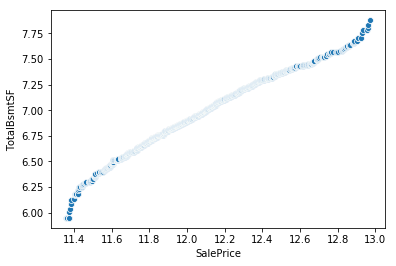

In [154]:
data_numeric = work_with_outl(data_numeric,'TotalBsmtSF')
sns.scatterplot(x=data_numeric['SalePrice'], y=data_numeric['TotalBsmtSF'])

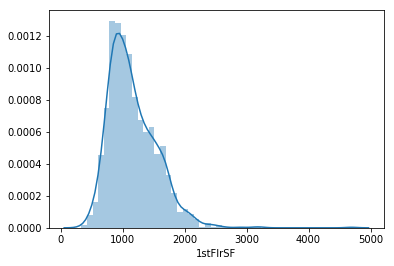

Skewness: 1.397564


In [155]:
sns.distplot(data_numeric['1stFlrSF'])
plt.show()
print("Skewness: %f" % data_numeric['1stFlrSF'].skew())

In [156]:
data_numeric['1stFlrSF'] = np.log(data_numeric['1stFlrSF'])

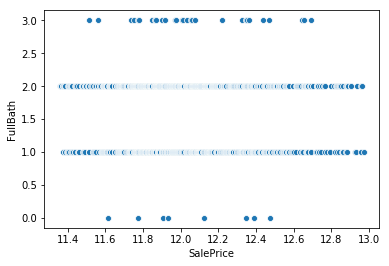

In [157]:
sns.scatterplot(x=data_numeric['SalePrice'], y=data_numeric['FullBath'])
plt.show()

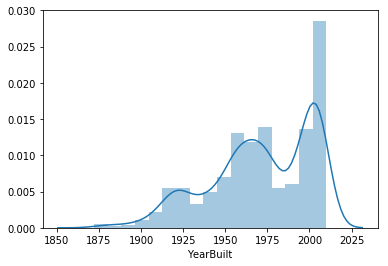

In [158]:
sns.distplot(data_numeric['YearBuilt'])
plt.show()
#log transformation doesn't help. I won't normilize it, since it's year and I'll just perform StandartScale norm.
# the same for all dates

In [159]:
data_numeric['Fireplaces'].describe()

count    1380.000000
mean        0.613768
std         0.643559
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

In [160]:
data_numeric['MasVnrArea'].isnull().any()

False

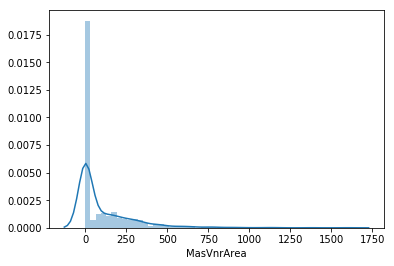

In [161]:
sns.distplot(data_numeric['MasVnrArea'])
plt.show()

In [162]:
make_normal_log(data_numeric, 'MasVnrArea')

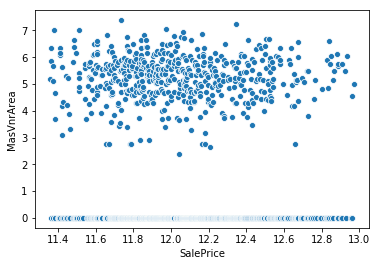

In [163]:
work_with_outl(data_numeric,'MasVnrArea')
sns.scatterplot(x=data_numeric['SalePrice'], y=data_numeric['MasVnrArea'])

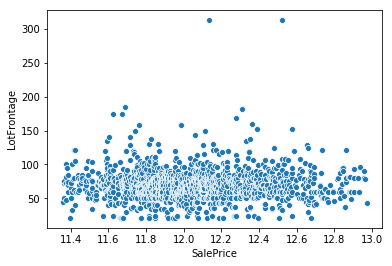

In [164]:
sns.scatterplot(x=data_numeric['SalePrice'], y=data_numeric['LotFrontage'])

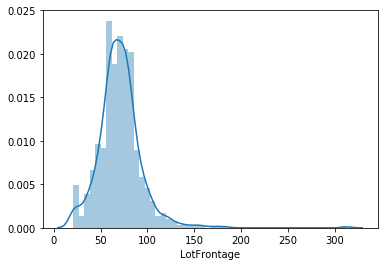

In [165]:
sns.distplot(data_numeric['LotFrontage'])
plt.show()

In [166]:
data_numeric = work_with_outl(data_numeric,'LotFrontage')

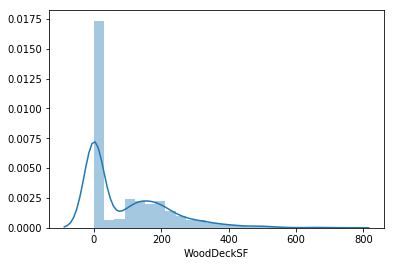

In [167]:
sns.distplot(data_numeric['WoodDeckSF'])
plt.show()

In [168]:
make_normal_log(data_numeric, 'WoodDeckSF')

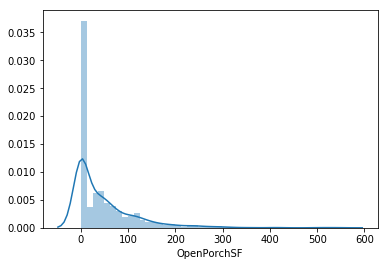

In [169]:
sns.distplot(data_numeric['OpenPorchSF'])
plt.show()

In [170]:
make_normal_log(data_numeric, 'OpenPorchSF')

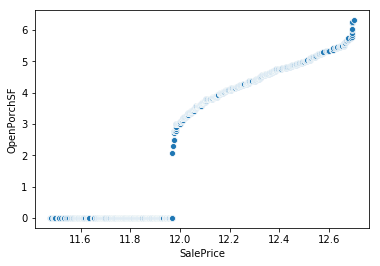

In [171]:
data_numeric = work_with_outl(data_numeric,'OpenPorchSF')
sns.scatterplot(x=data_numeric['SalePrice'], y=data_numeric['OpenPorchSF'])

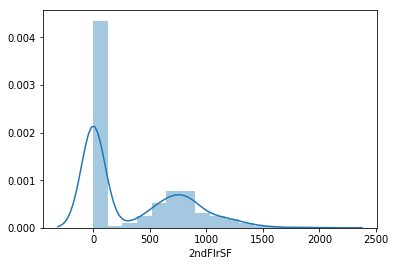

In [172]:
sns.distplot(data_numeric['2ndFlrSF'])
plt.show()

In [173]:
make_normal_log(data_numeric, '2ndFlrSF')

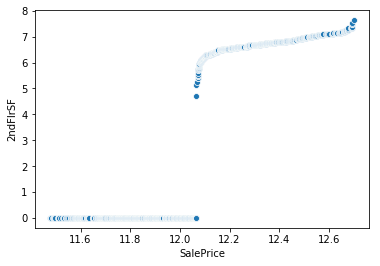

In [174]:
data_numeric = work_with_outl(data_numeric,'2ndFlrSF')
sns.scatterplot(x=data_numeric['SalePrice'], y=data_numeric['2ndFlrSF'])

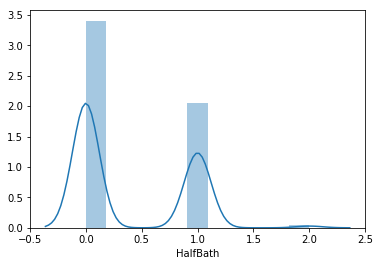

In [175]:
sns.distplot(data_numeric['HalfBath'])
plt.show()

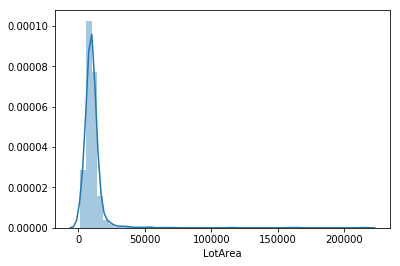

In [176]:
sns.distplot(data_numeric['LotArea'])
plt.show()

In [177]:
make_normal_log(data_numeric, 'LotArea')

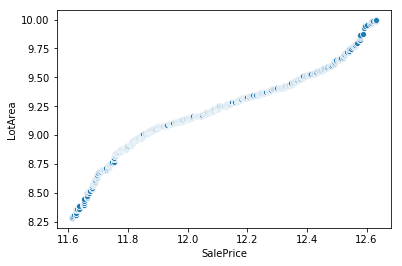

In [178]:
data_numeric = work_with_outl(data_numeric,'LotArea')
sns.scatterplot(x=data_numeric['SalePrice'], y=data_numeric['LotArea'])

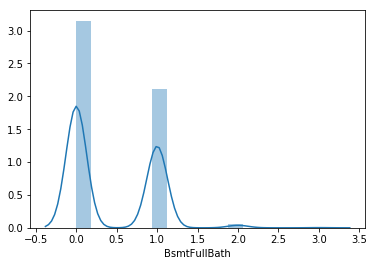

In [179]:
sns.distplot(data_numeric['BsmtFullBath'])
plt.show()

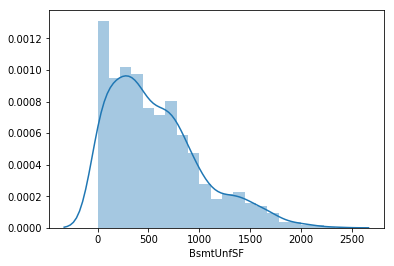

In [180]:
sns.distplot(data_numeric['BsmtUnfSF'])
plt.show()

In [181]:
make_normal_log(data_numeric, 'BsmtUnfSF')

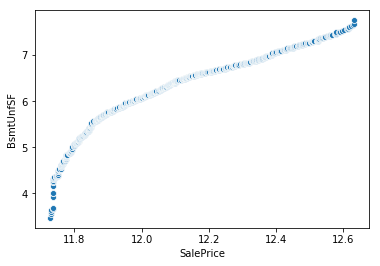

In [182]:
data_numeric = work_with_outl(data_numeric,'BsmtUnfSF')
sns.scatterplot(x=data_numeric['SalePrice'], y=data_numeric['BsmtUnfSF'])

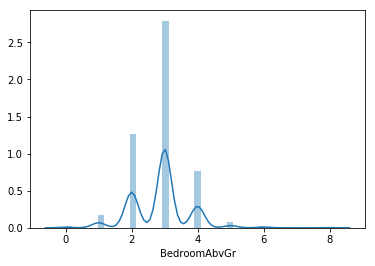

In [183]:
sns.distplot(data_numeric['BedroomAbvGr'])
plt.show()

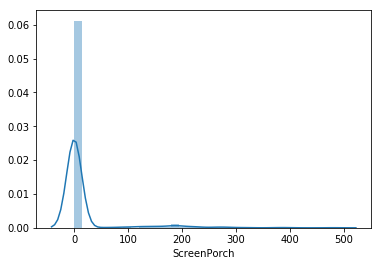

In [184]:
sns.distplot(data_numeric['ScreenPorch'])
plt.show()

In [185]:
data_numeric['ScreenPorch'].describe()

count    1059.000000
mean       15.544854
std        56.379676
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64

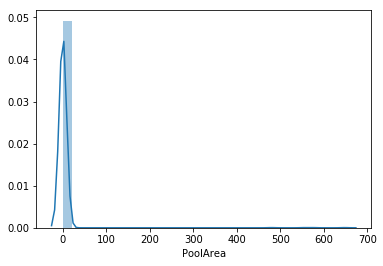

In [186]:
sns.distplot(data_numeric['PoolArea'])
plt.show()

In [187]:
data_numeric['PoolArea'].describe()

count    1059.000000
mean        2.133144
std        34.854358
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       648.000000
Name: PoolArea, dtype: float64

In [188]:
#these two have a very low corr with SalePrice, despite this correlation is significant
#and the last one from the list as a found later
data_numeric = data_numeric.drop(columns=['PoolArea','PoolArea','3SsnPorch'])

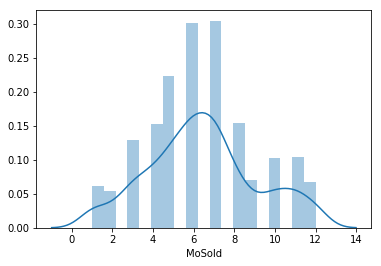

In [189]:
sns.distplot(data_numeric['MoSold'])
plt.show()

In [190]:
make_normal_log(data_numeric, 'MoSold')

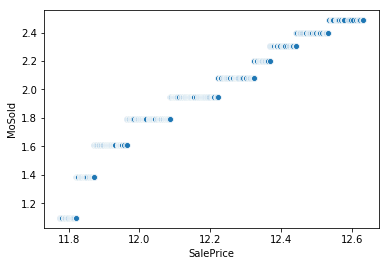

In [191]:
data_numeric = work_with_outl(data_numeric,'MoSold')
sns.scatterplot(x=data_numeric['SalePrice'], y=data_numeric['MoSold'])

In [192]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 71 to 1058
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   level_0        988 non-null    int64  
 1   index          988 non-null    int64  
 2   Id             988 non-null    float64
 3   MSSubClass     988 non-null    float64
 4   LotFrontage    988 non-null    float64
 5   LotArea        988 non-null    float64
 6   OverallQual    988 non-null    float64
 7   OverallCond    988 non-null    float64
 8   YearBuilt      988 non-null    float64
 9   YearRemodAdd   988 non-null    float64
 10  MasVnrArea     988 non-null    float64
 11  BsmtFinSF1     988 non-null    float64
 12  BsmtFinSF2     988 non-null    float64
 13  BsmtUnfSF      988 non-null    float64
 14  TotalBsmtSF    988 non-null    float64
 15  1stFlrSF       988 non-null    float64
 16  2ndFlrSF       988 non-null    float64
 17  LowQualFinSF   988 non-null    float64
 18  GrLivAre

In [194]:
data_numeric = data_numeric.drop(columns=['level_0','index','Id','Check'], axis=1)
#data_numeric = data_numeric.drop(columns=['Id','Check'], axis=1)

KeyError: "['level_0' 'index' 'Id' 'Check'] not found in axis"

In [195]:
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
71,70.0,57.554509,8.862767,5.0,7.0,1920.0,1997.0,0.000000,456.0,0.0,...,0.0,3.0,6.0,5.0,2.0,4.0,1.0,2.0,8.0,4.0
72,20.0,57.672813,8.865312,6.0,5.0,1963.0,1963.0,5.509388,609.0,0.0,...,4.0,3.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
73,80.0,57.850785,8.867005,6.0,5.0,1962.0,1962.0,5.720312,371.0,0.0,...,4.0,3.0,6.0,2.0,1.0,4.0,4.0,2.0,8.0,4.0
74,20.0,57.965533,8.867850,5.0,6.0,1954.0,1954.0,5.298317,540.0,0.0,...,4.0,3.0,6.0,1.0,0.0,4.0,4.0,2.0,8.0,4.0
75,20.0,58.000000,8.871786,5.0,7.0,1959.0,2006.0,0.000000,72.0,258.0,...,4.0,2.0,6.0,5.0,0.0,4.0,4.0,2.0,8.0,4.0


### Now let's split data and standardize it

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [197]:
dataX = data_numeric.drop(columns=['SalePrice'], axis=1)
dataY = data_numeric.loc[:,'SalePrice']

In [198]:
sc = StandardScaler()
dataX = sc.fit_transform(dataX)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 0.3, random_state = 42)

In [200]:
X_train = np.c_[np.ones(len(X_train)), X_train]
X_test = np.c_[np.ones(len(X_test)), X_test]

In [201]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [202]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction_tr = model.predict(X_train)
prediction_te = model.predict(X_test)

In [203]:
acc_tr = model.score(X_train, prediction_tr) #Return the coefficient of determination R^2 of the prediction.
acc_te = model.score(X_test, prediction_te) #Return the coefficient of determination R^2 of the prediction.
print(acc_tr, acc_te)

1.0 1.0


### Polynom

In [204]:
poly = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
    
model.fit(X_train_poly, y_train)
predict_train = model.predict(X_train_poly)
predicted_test = model.predict(X_test_poly)

In [205]:
acc_tr = model.score(X_train_poly, y_train)#Return the coefficient of determination R^2 of the prediction.
acc_te = model.score(X_test_poly, y_test)#Return the coefficient of determination R^2 of the prediction.

print (acc_tr, acc_te)

1.0 0.8757773159530756


### Gradient Boost

In [206]:
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [207]:
model2.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [208]:
model2.score(X_train, y_train)

0.9998654065720933

### HGBoost

In [209]:
import xgboost as xgb
model3 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [210]:
model3.fit(X_train, y_train)

[00:28:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, silent=1, subsample=0.5213,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [211]:
model3.score(X_train, y_train)

0.9932396971808093

## Do preparations for test set

In [212]:
train_subm = pd.read_csv('/Users/apple/Documents/!data analysis/Kaggle/test HPr.csv')
train = train_subm.copy()

In [213]:
data_for_check = data_numeric.drop(columns=['SalePrice'], axis=1)
col_lst_check = list(data_for_check.columns)
train_cols = list(train.columns)

In [214]:
for col in train_cols:
    if col not in col_lst_check:
        train = train.drop([col], axis=1)
    else:
        pass

In [215]:
len(list(train.columns)) == len(col_lst_check)

True

In [216]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [217]:
data_numeric_train = train.select_dtypes(include=[np.float, np.int])
data_categ_train = train.select_dtypes(include=[np.object])

In [218]:
data_numeric_train = pd.DataFrame(data=mice.fit_transform(data_numeric_train), 
                            columns=data_numeric_train.columns, index=data_numeric_train.index)

data_numeric_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,1961.0,1.0,730.0,140.0,0.0,0.0,120.0,0.0,6.0,2010.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,12500.0,6.0,2010.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,3.0,2010.0


In [219]:
data_cat_enc_train = data_categ_train.apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))
data_categ_train = pd.DataFrame(data=mice.fit_transform(data_cat_enc_train), 
                            columns=data_cat_enc_train.columns, index=data_cat_enc_train.index)
data_categ_train.head(2)

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,1.0,2.0,...,3.0,3.0,6.0,1.0,2.0,3.0,4.0,2.0,8.0,4.0
1,3.0,1.0,0.0,3.0,0.0,0.0,0.0,12.0,2.0,2.0,...,3.0,2.0,6.0,1.0,2.0,3.0,4.0,2.0,8.0,4.0


In [220]:
data_categ_train.isnull().any().any()

False

In [221]:
data_numeric_train = pd.concat([data_numeric_train, data_categ_train], axis=1, sort=False)

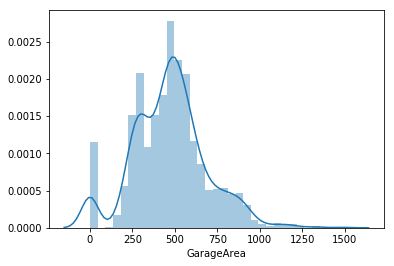

In [222]:
sns.distplot(data_numeric_train['GarageArea'])

In [223]:
data_numeric_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   float64
 3   OverallQual    1459 non-null   float64
 4   OverallCond    1459 non-null   float64
 5   YearBuilt      1459 non-null   float64
 6   YearRemodAdd   1459 non-null   float64
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   float64
 13  2ndFlrSF       1459 non-null   float64
 14  LowQualFinSF   1459 non-null   float64
 15  GrLivArea      1459 non-null   float64
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath

In [103]:
#data_numeric_train = data_numeric_train.drop(['Check'], axis=1)

In [224]:
data_numeric_train_norm = sc.fit_transform(data_numeric_train)

In [225]:
data_numeric_train_norm = np.c_[np.ones(len(data_numeric_train_norm)), data_numeric_train_norm]

### Result Lin Reg

In [226]:
#result = model.predict(data_numeric_train_norm)

In [227]:
def for_subm(result):
    result = np.c_[train_subm.iloc[:,0], result]
    result_df = pd.DataFrame(data=result, columns=["Id", "SalePrice"])
    result_df['Id'] = result_df['Id'].astype('int32')
    result_df.to_csv('result_reg.csv', index=False)

In [228]:
#for_subm(result)

In [229]:
#result_df.to_csv('result_reg.csv', index=False)

### Result Poly(3) reg

In [230]:
X_res_poly = poly.fit_transform(data_numeric_train_norm)

In [231]:
result1 = model.predict(X_res_poly)
result1 = result1*1000

In [235]:
for_subm(result1)

### Result Gardient boost

In [ ]:
result2 = model2.predict(data_numeric_train_norm)

In [ ]:
for_subm(result2)

### Result XGBoost

In [236]:
result3 = model3.predict(data_numeric_train_norm)
result3 = result3*1000

In [237]:
for_subm(result3)

References
* https://stackoverflow.com/questions/54444260/labelencoder-that-keeps-missing-values-as-nan !!!
* https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
* https://stackoverflow.com/questions/41217310/get-index-of-a-row-of-a-pandas-dataframe-as-an-integer